#### Import dependencies and load data

In [104]:
!pip install --user -r requirements.txt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [105]:
import pandas as pd
import numpy as np
import json
import shutil
import WorldWeatherPy
from matplotlib import pyplot as plt
import seaborn as sns
import os
from joblib import dump, load

from WorldWeatherPy import DetermineListOfAttributes
from WorldWeatherPy import RetrieveByAttribute

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from joblib import dump
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [106]:
api_key = 'bd35020cdd3643f4b69142436222912'
attributes = ['date','time', 'tempC', 'windspeedKmph','weatherDesc', 'precipMM', 'humidity', 'visibility', 'pressure', 'cloudcover']

conditions = ['Sunny','Clear','Cloudy','Rain','Snow']
location_list = ['milan','turin','florence','bologna','rome','naples','palermo']

frequency = 3
start_date = '2016-1-1' 
end_date = '2023-1-1'              

In [3]:
os.makedirs(f'data', exist_ok=True)
for location in location_list:
    data = RetrieveByAttribute(api_key, attributes, location, start_date, end_date , frequency).retrieve_hist_data()
    data.to_csv(f'data/{location}.csv', encoding='utf-8', index=False) 



Retrieving weather data for milan


Retrieving data for milan from: 2016-01-01 to: 2016-01-31


/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.891908
Retrieving data for milan from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:03.441940
Retrieving data for milan from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:06.010955
Retrieving data for milan from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:07.862416
Retrieving data for milan from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:09.565925
Retrieving data for milan from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:10.701686
Retrieving data for milan from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:12.861162
Retrieving data for milan from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:14.181074
Retrieving data for milan from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:15.263112
Retrieving data for milan from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:16.884340
Retrieving data for milan from: 2016-11-01 to: 2016-11-30


/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.664264
Retrieving data for turin from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:03.727047
Retrieving data for turin from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:06.368421
Retrieving data for turin from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:08.467814
Retrieving data for turin from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:10.470251
Retrieving data for turin from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:11.946209
Retrieving data for turin from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:13.262580
Retrieving data for turin from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:14.990748
Retrieving data for turin from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:16.418252
Retrieving data for turin from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:18.237602
Retrieving data for turin from: 2016-11-01 to: 2016-11-30


/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.055690
Retrieving data for florence from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.188056
Retrieving data for florence from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.436872
Retrieving data for florence from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.209297
Retrieving data for florence from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:05.477120
Retrieving data for florence from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:06.806565
Retrieving data for florence from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:08.316746
Retrieving data for florence from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:09.563276
Retrieving data for florence from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:11.924864
Retrieving data for florence from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:13.127324
Retrieving data for florence fr

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:00.975429
Retrieving data for bologna from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:01.796885
Retrieving data for bologna from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.093312
Retrieving data for bologna from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.531416
Retrieving data for bologna from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:05.656213
Retrieving data for bologna from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:06.843041
Retrieving data for bologna from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:08.258220
Retrieving data for bologna from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:09.652697
Retrieving data for bologna from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:10.855758
Retrieving data for bologna from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:12.777758
Retrieving data for bologna from: 2016-1

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.400803
Retrieving data for rome from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.394514
Retrieving data for rome from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.542578
Retrieving data for rome from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:05.331794
Retrieving data for rome from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:06.583899
Retrieving data for rome from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:07.834503
Retrieving data for rome from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:09.051286
Retrieving data for rome from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:10.374636
Retrieving data for rome from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:12.221706
Retrieving data for rome from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:13.738888
Retrieving data for rome from: 2016-11-01 to: 2016-11-30
Time elaps

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.789133
Retrieving data for naples from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:04.819510
Retrieving data for naples from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:07.894447
Retrieving data for naples from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:09.351172
Retrieving data for naples from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:11.630455
Retrieving data for naples from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:13.475738
Retrieving data for naples from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:14.780848
Retrieving data for naples from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:16.105435
Retrieving data for naples from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:17.412586
Retrieving data for naples from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:19.131532
Retrieving data for naples from: 2016-11-01 to: 2

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.498628
Retrieving data for palermo from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:03.692333
Retrieving data for palermo from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:05.725046
Retrieving data for palermo from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:07.601821
Retrieving data for palermo from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:09.445474
Retrieving data for palermo from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:10.811555
Retrieving data for palermo from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:12.084141
Retrieving data for palermo from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:13.596071
Retrieving data for palermo from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:14.878232
Retrieving data for palermo from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:16.117235
Retrieving data for palermo from: 2016-1

In [4]:
data = pd.read_csv(f'data/milan.csv')
data.head(-10)

,date,time,tempC,windspeedKmph,weatherDesc,precipMM,humidity,visibility,pressure,cloudcover,city
0,2016-01-01,0,2,5,[{'value': 'Partly cloudy'}],0.0,89,10,1027,49,milan
1,2016-01-01,3,1,2,[{'value': 'Clear'}],0.0,91,10,1026,17,milan
2,2016-01-01,6,1,1,[{'value': 'Sunny'}],0.0,91,10,1027,16,milan
3,2016-01-01,9,3,2,[{'value': 'Sunny'}],0.0,71,10,1026,12,milan
4,2016-01-01,12,6,5,[{'value': 'Sunny'}],0.0,63,10,1025,12,milan
...,...,...,...,...,...,...,...,...,...,...,...
20449,2022-12-31,3,6,8,[{'value': 'Clear'}],0.0,75,10,1025,14,milan
20450,2022-12-31,6,6,7,[{'value': 'Sunny'}],0.0,76,10,1027,7,milan
20451,2022-12-31,9,6,3,[{'value': 'Sunny'}],0.0,75,10,1029,10,milan
20452,2022-12-31,12,10,1,[{'value': 'Sunny'}],0.0,62,10,1030,8,milan


In [5]:
null_values = data.isnull()
null_counts = null_values.sum()
null_counts

date             0
time             0
tempC            0
windspeedKmph    0
weatherDesc      0
precipMM         0
humidity         0
visibility       0
pressure         0
cloudcover       0
city             0
dtype: int64

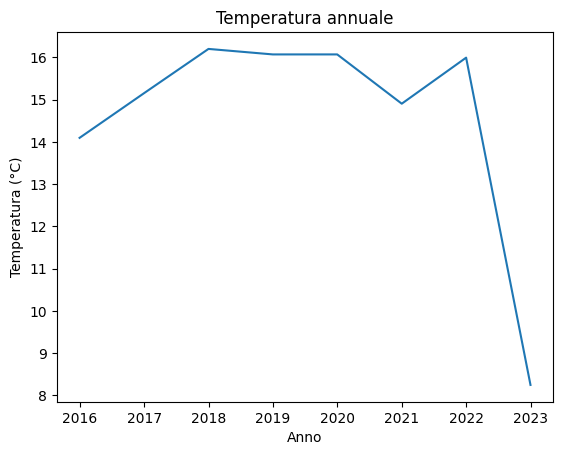

In [6]:
df = data

df['date']
df['date'] = pd.to_datetime(df['date'])
df_years = df.resample('A', on='date', label='left').mean()

# Seleziona l'indice del DataFrame come eixo x e la colonna 'tempC' come eixo y
x = df_years.index
y = df_years['tempC']

plt.plot(x, y)

plt.title('Temperatura annuale')
plt.xlabel('Anno')
plt.ylabel('Temperatura (°C)')

plt.show()


In [107]:
for location in location_list:

    data = pd.read_csv(f'data/{location}.csv')
    tmp = []

    for i, row in data.iterrows():
        found = False
        for j in conditions:
            if j.lower() in row['weatherDesc'].lower():
                data.at[i, 'weatherDesc'] = j
                found = True
                break
        if not found:
            tmp.append(i)

    data = data.drop(tmp)
    data = data.drop_duplicates()
    data = data.dropna()
    data[data.select_dtypes(include='number').columns] = data[data.select_dtypes(include='number').columns].replace(-0, 0)
    data = data.reset_index(drop=True)
    data.to_csv(f'data/{location}.csv', index=False)


In [8]:
data = pd.read_csv(f'data/milan.csv')
data.head(-10)

,date,time,tempC,windspeedKmph,weatherDesc,precipMM,humidity,visibility,pressure,cloudcover,city
0,2016-01-01,0,2,5,Cloudy,0.0,89,10,1027,49,milan
1,2016-01-01,3,1,2,Clear,0.0,91,10,1026,17,milan
2,2016-01-01,6,1,1,Sunny,0.0,91,10,1027,16,milan
3,2016-01-01,9,3,2,Sunny,0.0,71,10,1026,12,milan
4,2016-01-01,12,6,5,Sunny,0.0,63,10,1025,12,milan
...,...,...,...,...,...,...,...,...,...,...,...
18703,2022-12-30,3,7,3,Rain,0.1,83,10,1021,100,milan
18704,2022-12-30,6,7,5,Rain,0.1,82,10,1022,66,milan
18705,2022-12-30,9,7,4,Cloudy,0.0,79,10,1023,66,milan
18706,2022-12-31,0,7,7,Cloudy,0.0,74,10,1025,49,milan


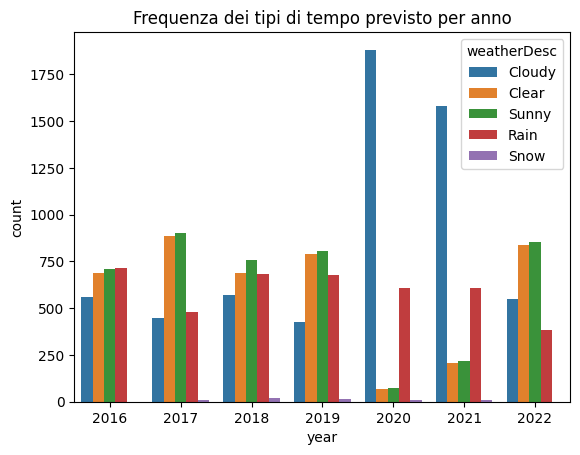

In [9]:
df = data

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

years = df['year'].unique().tolist()

years.pop()

df = df[df['year'].isin(years)]

x = df['year']
y = df['weatherDesc']

sns.countplot(x='year', hue='weatherDesc', data=df)

plt.title('Frequenza dei tipi di tempo previsto per anno')

plt.show()


## DATA PROCESSING

In [108]:
def data_pre_processing(location):

    data = pd.read_csv(f'data/{location}.csv')

    data = data.drop(['date','time','city'], axis=1) # Tuttavia, se si utilizza un modello di Random Forest su un dataset di diverse città, il modello potrebbe essere in grado di apprendere autonomamente queste differenze e quindi la colonna 'city' potrebbe non essere necessaria.
    y = data[['weatherDesc']]
    x = data.drop(['weatherDesc'], axis=1)
    columns = x.columns

    scaler = StandardScaler()
    scaler.fit(x)
    X = scaler.transform(x)

    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    os.makedirs(f'scaler_encoder', exist_ok=True)
    os.makedirs(f'scaler_encoder/{location}', exist_ok=True)
    dump(encoder, f'scaler_encoder/{location}/{location}_encoder.joblib')
    dump(scaler, f'scaler_encoder/{location}/{location}_scaler.joblib')


    features = pd.DataFrame(X, columns = columns)
    
    return features, y

In [11]:
location = 'milan'
features, y = data_pre_processing(location)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18718 entries, 0 to 18717
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tempC          18718 non-null  float64
 1   windspeedKmph  18718 non-null  float64
 2   precipMM       18718 non-null  float64
 3   humidity       18718 non-null  float64
 4   visibility     18718 non-null  float64
 5   pressure       18718 non-null  float64
 6   cloudcover     18718 non-null  float64
dtypes: float64(7)
memory usage: 1023.8 KB


In [13]:
encoder = load('scaler_encoder/milan/milan_encoder.joblib')

classes = encoder.classes_

inverse_mapping = {i: classes[i] for i in range(len(classes))}

for key, value in inverse_mapping.items():
    print(f"{value}: {key}")



Clear: 0
Cloudy: 1
Rain: 2
Snow: 3
Sunny: 4


## ML

In [109]:
# Criteria
criteria = ['gini','entropy']

bootstrap = True
max_features = 'sqrt'

penalty = 'l2'
solvers = ['newton-cg','lbfgs', 'liblinear']

In [26]:
def tuning_dc(location):
    
    features, y, = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    param_distributions = {'max_depth': np.arange(5, 15)}

    # Crea un oggetto di ricerca random search utilizzando il decision tree come modello e la distribuzione di probabilità come iperparametri
    random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions, cv = 5, n_iter = 10)

    # Eseguo la ricerca random search utilizzando i dati di addestramento
    random_search.fit(X_train, y_train)
    return random_search.best_params_

In [27]:
os.makedirs(f'tuning', exist_ok=True)
os.makedirs(f'tuning/decision_tree', exist_ok=True)

# Salvo gli iperparamtri in un dizionario che ha come chiave la location e come valore gli iperparametri
d = {}

for location in location_list:
    best_parms = tuning_dc(location)
    best_parms = {k: int(v) if isinstance(v, np.int64) else v for k, v in best_parms.items()}
    d[location] = list(best_parms.values())
    
best_parms_json = json.dumps(d)

with open('tuning/decision_tree/parms.csv', 'w') as f:
    json.dump(best_parms_json, f) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

In [73]:
def tuning_rf(location):
    
    features, y, = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    param_distributions = {'n_estimators': np.arange(100, 500, 50), 'max_depth': np.arange(5, 15)}

    # Creo un oggetto di ricerca random search utilizzando la random forest come modello e la distribuzione di probabilità come iperparametri
    random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions, cv = 5, n_iter = 10)

    # Eseguo la ricerca random search utilizzando i dati di addestramento
    random_search.fit(X_train, y_train)
    
    return random_search.best_params_

In [ ]:
os.makedirs(f'tuning', exist_ok=True)
os.makedirs(f'tuning/random_forest', exist_ok=True)

d = {}

for location in location_list:
    best_parms = tuning_rf(location)
    best_parms = {k: int(v) if isinstance(v, np.int64) else v for k, v in best_parms.items()}
    d[location] = list(best_parms.values())
    
best_parms_json = json.dumps(d)

with open('tuning/random_forest/parms.csv', 'w') as f:
    json.dump(best_parms_json, f)    

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

In [ ]:
def tuning_lr(location):
    
    features, y, = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    # Creo una distribuzione di probabilità per il parametro C della regressione logistica e il max_iter
    param_distributions = {'C': np.random.uniform(0.1, 10, 100), 'max_iter': np.arange(500, 10000, 500)}

    # Creo un oggetto di ricerca casuale utilizzando la regressione logistica come modello e la distribuzione di probabilità come iperparametri
    random_search = RandomizedSearchCV(LogisticRegression(), param_distributions, cv = 5, n_iter = 10)
    
    random_search.fit(X_train, y_train)

    return random_search.best_params_

In [49]:
os.makedirs(f'tuning', exist_ok=True)
os.makedirs(f'tuning/logistic_regression', exist_ok=True)

d = {}

for location in location_list:
    best_parms = tuning_lr(location)
    best_parms = {k: int(v) if isinstance(v, np.int64) else v for k, v in best_parms.items()}
    d[location] = list(best_parms.values())
    
best_parms_json = json.dumps(d)

with open('tuning/logistic_regression/parms.csv', 'w') as f:
    json.dump(best_parms_json, f)  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

In [110]:
def decision_tree(location, n_criterion):

    features, y, = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    criterion = criteria[n_criterion]

    with open('tuning/decision_tree/parms.csv') as f:
        parms = json.load(f)

    parms = json.loads(parms)

    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3)

    model = DecisionTreeClassifier(max_depth = parms[location][0], criterion = criterion)
    model.fit(X_train, y_train)

    os.makedirs(f'models', exist_ok=True)
    os.makedirs(f'models/{location}', exist_ok=True)
    dump(model, f'models/{location}/{location}_decision_tree_{criterion}.joblib')

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [111]:
def random_forest(location, n_criterion):

    features, y = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    criterion = criteria[n_criterion]

    with open('tuning/random_forest/parms.csv') as f:
        parms = json.load(f)

    parms = json.loads(parms)

    model = RandomForestClassifier(n_estimators = parms[location][0], max_features = max_features, 
                                   criterion = criterion, max_depth = parms[location][1], bootstrap = bootstrap )
    model.fit(X_train, y_train)
    
    os.makedirs(f'models', exist_ok=True)
    os.makedirs(f'models/{location}', exist_ok=True)
    dump(model, f'models/{location}/{location}_random_forest_{criterion}.joblib')

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [112]:
def logistic_regression(location, n_solver):

    features, y = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    solver = solvers[n_solver]
    
    with open('tuning/logistic_regression/parms.csv') as f:
        parms = json.load(f)

    parms = json.loads(parms)

    model = LogisticRegression(penalty = penalty , C = parms[location][1], solver = solver , max_iter = parms[location][0])
    model.fit(X_train, y_train)

    os.makedirs(f'models', exist_ok=True)
    os.makedirs(f'models/{location}', exist_ok=True)
    dump(model, f'models/{location}/{location}_logistic_regression_{solver}.joblib')

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

## Results

In [113]:
def show_results_dc(accuracy_file, location, accuracy_0, accuracy_1):
    
    with open('tuning/decision_tree/parms.csv') as f:
        parms = json.load(f)

    parms = json.loads(parms)

    with open(accuracy_file, 'a') as f:
        f.write('Decision_tree_gini(accuracy) in ' + location + ': ' + str(accuracy_0) + '\n')
        f.write('Decision_tree_entropy(accuracy) in ' + location + ': ' + str(accuracy_1) + '\n')

    print(f"Decision_tree_gini_{parms[location][0]} in {location}: {accuracy_0} ")
    print(f"Decision_tree_entropy_{parms[location][0]}(accuracy) in {location}: {accuracy_1} " + '\n')

In [114]:
def show_results_rf(accuracy_file, location, accuracy_0, accuracy_1):
    
    with open('tuning/random_forest/parms.csv') as f:
        parms = json.load(f)

    parms = json.loads(parms)

    with open(accuracy_file, 'a') as f:
        f.write('Random_forest_gini(accuracy) in ' + location + ': ' + str(accuracy_0) + '\n')
        f.write('Random_forest_entropy(accuracy) in ' + location + ': ' + str(accuracy_1) + '\n')

    print(f"Random_forest_gini_{parms[location][0]}_{parms[location][1]}(accuracy) in {location}: {accuracy_0} ")
    print(f"Random_forest_entropy_{parms[location][0]}_{parms[location][1]}(accuracy) in {location}: {accuracy_1} " + '\n')

In [115]:
def show_results_lr(accuracy_file, location, accuracy_0, accuracy_1, accuracy_2):
    
   
    with open('tuning/logistic_regression/parms.csv') as f:
        parms = json.load(f)

    parms = json.loads(parms)

    with open(accuracy_file, 'a') as f:
        f.write('Logistic_regression_newton-cg(accuracy) in ' + location + ': ' + str(accuracy_0) + '\n')
        f.write('Logistic_regression_lbfgs(accuracy) in ' + location + ': ' + str(accuracy_1) + '\n')
        f.write('Logistic_regression_liblinear(accuracy) in ' + location + ': ' + str(accuracy_2) + '\n')

    print(f"Logistic_regression_newton-cg_{parms[location][1]}_{parms[location][0]}(accuracy) in {location}: {accuracy_0} ")
    print(f"Logistic_regression_lbfgs_{parms[location][1]}_{parms[location][0]}(accuracy) in {location}: {accuracy_1} ")
    print(f"Logistic_regression_liblinear_{parms[location][1]}_{parms[location][0]}(accuracy) in {location}: {accuracy_2} " + '\n')

In [116]:
def classify(location):
    os.makedirs(f'results', exist_ok=True)
    os.makedirs(f'results/{location}', exist_ok=True)
    accuracy_file = f'results/{location}/accuracy.txt'
    
    accuracy_dc_0 = decision_tree(location, 0)
    accuracy_dc_1 = decision_tree(location, 1)

    accuracy_rf_0 = random_forest(location, 0)
    accuracy_rf_1 = random_forest(location, 1)

    accuracy_lr_0 = logistic_regression(location, 0)
    accuracy_lr_1 = logistic_regression(location, 1)
    accuracy_lr_2 = logistic_regression(location, 2)

    show_results_dc(accuracy_file,location, accuracy_dc_0, accuracy_dc_1)
    show_results_rf(accuracy_file,location, accuracy_rf_0, accuracy_rf_1)
    show_results_lr(accuracy_file,location, accuracy_lr_0, accuracy_lr_1, accuracy_lr_2)

In [117]:
for location in location_list:
    classify(location)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_6 in milan: 0.7122507122507122 
Decision_tree_entropy_6(accuracy) in milan: 0.7026353276353277 

Random_forest_gini_350_11(accuracy) in milan: 0.7177706552706553 
Random_forest_entropy_350_11(accuracy) in milan: 0.718482905982906 

Logistic_regression_newton-cg_5.087051423544548_5500(accuracy) in milan: 0.6896367521367521 
Logistic_regression_lbfgs_5.087051423544548_5500(accuracy) in milan: 0.6896367521367521 
Logistic_regression_liblinear_5.087051423544548_5500(accuracy) in milan: 0.6875 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in turin: 0.7111740747299451 
Decision_tree_entropy_7(accuracy) in turin: 0.7102886488400921 

Random_forest_gini_250_13(accuracy) in turin: 0.7271117407472995 
Random_forest_entropy_250_13(accuracy) in turin: 0.729059677704976 

Logistic_regression_newton-cg_6.186502669700887_1500(accuracy) in turin: 0.6943509828227378 
Logistic_regression_lbfgs_6.186502669700887_1500(accuracy) in turin: 0.6943509828227378 
Logistic_regression_liblinear_6.186502669700887_1500(accuracy) in turin: 0.6851425535682664 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in florence: 0.727802037845706 
Decision_tree_entropy_7(accuracy) in florence: 0.7208879184861717 

Random_forest_gini_300_13(accuracy) in florence: 0.7496360989810772 
Random_forest_entropy_300_13(accuracy) in florence: 0.7490902474526928 

Logistic_regression_newton-cg_9.93281453940226_5500(accuracy) in florence: 0.7179767103347889 
Logistic_regression_lbfgs_9.93281453940226_5500(accuracy) in florence: 0.7179767103347889 
Logistic_regression_liblinear_9.93281453940226_5500(accuracy) in florence: 0.7043304221251819 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_5 in bologna: 0.6934346174715138 
Decision_tree_entropy_5(accuracy) in bologna: 0.6892747332248146 

Random_forest_gini_350_13(accuracy) in bologna: 0.7174896002893832 
Random_forest_entropy_350_13(accuracy) in bologna: 0.7169470066919877 

Logistic_regression_newton-cg_7.753041466918087_3000(accuracy) in bologna: 0.6833062036534635 
Logistic_regression_lbfgs_7.753041466918087_3000(accuracy) in bologna: 0.6833062036534635 
Logistic_regression_liblinear_7.753041466918087_3000(accuracy) in bologna: 0.6787845903418339 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in rome: 0.7156165311653117 
Decision_tree_entropy_7(accuracy) in rome: 0.7049457994579946 

Random_forest_gini_300_12(accuracy) in rome: 0.7240853658536586 
Random_forest_entropy_300_12(accuracy) in rome: 0.7242547425474255 

Logistic_regression_newton-cg_8.526228581429532_2500(accuracy) in rome: 0.6990176151761518 
Logistic_regression_lbfgs_8.526228581429532_2500(accuracy) in rome: 0.6990176151761518 
Logistic_regression_liblinear_8.526228581429532_2500(accuracy) in rome: 0.6935975609756098 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in naples: 0.6884082460290639 
Decision_tree_entropy_7(accuracy) in naples: 0.6971949983102399 

Random_forest_gini_400_13(accuracy) in naples: 0.7031091584994931 
Random_forest_entropy_400_13(accuracy) in naples: 0.7017573504562352 

Logistic_regression_newton-cg_9.03375965032543_4000(accuracy) in naples: 0.6747211895910781 
Logistic_regression_lbfgs_9.03375965032543_4000(accuracy) in naples: 0.6747211895910781 
Logistic_regression_liblinear_9.03375965032543_4000(accuracy) in naples: 0.673200405542413 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in palermo: 0.7195911413969336 
Decision_tree_entropy_7(accuracy) in palermo: 0.7175468483816013 

Random_forest_gini_200_13(accuracy) in palermo: 0.7477001703577513 
Random_forest_entropy_200_13(accuracy) in palermo: 0.7441226575809199 

Logistic_regression_newton-cg_8.72804237914556_8000(accuracy) in palermo: 0.7083475298126065 
Logistic_regression_lbfgs_8.72804237914556_8000(accuracy) in palermo: 0.7083475298126065 
Logistic_regression_liblinear_8.72804237914556_8000(accuracy) in palermo: 0.713458262350937 



In [118]:
def best_models(location): 
    
    with open(f"results/{location}/accuracy.txt", "r") as file:
        lines = file.readlines()
    
    # Dizionario delle prestazioni
    performance = {}

    for line in lines:
      # Separo il nome del modello e il valore di accuratezza utilizzando il carattere ":" come separatore
      model, accuracy = line.split(":")
      # Rimuovo gli spazi iniziali e finali dal nome del modello
      model = model.strip()
      # Rimuovo gli spazi iniziali e finali dal valore di accuratezza e lo converto in float
      accuracy = float(accuracy.strip())
      # Aggiungo il modello e il valore di accuratezza al dizionario delle prestazioni
      performance[model] = accuracy

    # Trovo il modello con le prestazioni migliori utilizzando la funzione "max" e il dizionario delle prestazioni
    best_model = max(performance, key=performance.get)

    # Trovo la posizione della prima parentesi tonda aperta
    open_parenthesis_index = best_model.index("(")

    # Estraggo il nome del modello
    model_name = best_model[:open_parenthesis_index]

    # Converto la prima lettera in minuscolo utilizzando il metodo "lower" sulla prima lettera
    model_name = model_name[0].lower() + model_name[1:]
    
    os.makedirs(f'best_models', exist_ok=True)
    os.makedirs(f'best_models/{location}', exist_ok=True)
    
    src_model = f"models/{location}/{location}_{model_name}.joblib"
    src_scaler = f"scaler_encoder/{location}/{location}_scaler.joblib"
    src_encoder = f"scaler_encoder/{location}/{location}_encoder.joblib"
    dst = f"best_models/{location}"

    shutil.copy(src_model, dst)
    shutil.copy(src_scaler, dst)
    shutil.copy(src_encoder, dst)
    
    with open(f"best_models/{location}/best_model_name.txt", "w") as file:
        file.write(f"{model_name}")


In [119]:
for location in location_list:
    best_models(location)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, 'milan_random_forest_entropy - Test Data')
              precision    recall  f1-score   support

           0       0.54      0.70      0.61      1261
           1       0.94      0.64      0.76      1806
           2       0.96      0.96      0.96      1249
           3       1.00      0.63      0.77        19
           4       0.53      0.61      0.57      1281

    accuracy                           0.72      5616
   macro avg       0.79      0.71      0.73      5616
weighted avg       0.76      0.72      0.73      5616



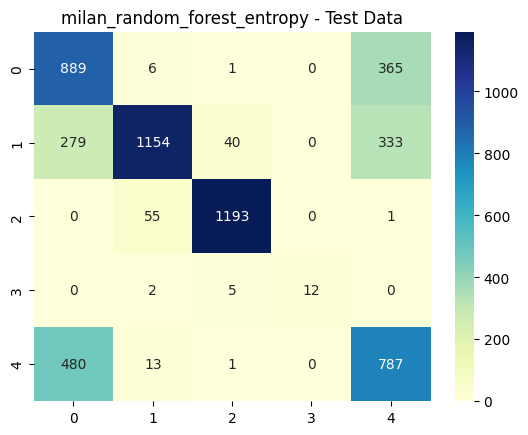

In [120]:
location = 'milan'
features, y = data_pre_processing(location)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)


with open(f"best_models/{location}/best_model_name.txt", "r") as file:
    model_name = file.readline()

model = load(f'best_models/{location}/{location}_{model_name}.joblib')
y_pred = model.predict(X_test)

test_matrix_0 = confusion_matrix(y_test, y_pred)
print(sns.heatmap(test_matrix_0, annot=True, cmap="YlGnBu",fmt="d").set_title(
f'{location}_{model_name} - Test Data'))

test_report_base = classification_report(y_test, y_pred)
print(test_report_base)

Text(0.5, 1.0, 'milan_random_forest_entropy - Train Data')
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      2901
           1       0.97      0.66      0.79      4207
           2       0.99      0.98      0.98      2909
           3       1.00      1.00      1.00        43
           4       0.61      0.72      0.66      3042

    accuracy                           0.77     13102
   macro avg       0.83      0.83      0.82     13102
weighted avg       0.81      0.77      0.78     13102



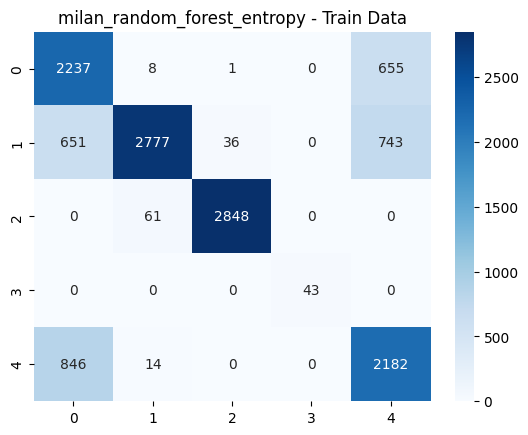

In [121]:
y_tpred_base = model.predict(X_train)

train_matrix_base = confusion_matrix(y_train, y_tpred_base)

print(sns.heatmap(train_matrix_base, annot=True, cmap="Blues",fmt="d").set_title(
f'{location}_{model_name} - Train Data'))

train_report_base = classification_report(y_train, y_tpred_base)
print(train_report_base)


## Inference

In [122]:
with open(f"best_models/milan/best_model_name.txt", "r") as file:
    model_name = file.readline()
    
scaler = load(f'best_models/milan/milan_scaler.joblib')
model = load(f'best_models/milan/milan_{model_name}.joblib')
encoder = load(f'best_models/milan/milan_encoder.joblib')

In [123]:
tempC           = 11
windspeedKmph   = 13
precipMM        = 0.0
humidity        = 1
visibility      = 5
pressure        = 5
cloudcover      = 1

features, y = data_pre_processing('milan')
 
feat_cols = features.columns
row = [tempC, windspeedKmph, precipMM, humidity, visibility, pressure, cloudcover]

df = pd.DataFrame([row], columns = feat_cols)
X = scaler.transform(df)
features = pd.DataFrame(X, columns = feat_cols)


prediction = model.predict(features)
prediction = encoder.inverse_transform(prediction)

print("Il meteo sarà : " + prediction )

['Il meteo sarà : Cloudy']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
